# Initial Dataset Exploration

In [1]:
import sys
import os
import importlib

In [2]:
# Add project to path so we can import our modules
sys.path.append(os.path.abspath(".."))

In [3]:
# Import functionality from our source code
import src.data_loading.data_loader as data_loader
importlib.reload(data_loader)
from src.data_loading.data_loader import load_data, get_numerical_features, get_categorical_features

In [4]:
# Load the data
df = load_data()

Loading data from c:\Users\Almi\Downloads\Credit_Score_Classification-main\Credit_Score_Classification-main\data\raw\credit_score_dataset.csv
Loaded dataset with 100000 rows and 27 columns


In [5]:
# Display the first 5 rows of the dataset for a quick glance
print("\nFirst 5 Rows of the Dataset:\n")
df.head()


First 5 Rows of the Dataset:



,ID,Customer_ID,Month,Name,City,Street,Age,SSN,Occupation,Annual_Income,...,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Credit_Score
0,NaN,CUS_0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,821-00-0265,Manager,19114.12,...,7,11.27,4.0,_,NaN,26.822620,22 Years and 1 Months,No,80.41529544,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,NaN,11.27,4.0,NaN,809.98,31.944960,NaN,No,118.2802216,3
2,0x1604,CUS_0xd40,NaN,NaN,Lonton,Oxford Street,-500.0,821-00-0265,Manager,19114.12,...,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.69952126,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580744,3
4,NaN,CUS_0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.42015309,3


In [6]:
# Display dataset shape in a readable format
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns\n")

Dataset Shape: 100000 rows, 27 columns



In [7]:
# Display dataset information in a readable format
print("Dataset Information:\n")
df.info()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        90058 non-null   object 
 1   Customer_ID               90107 non-null   object 
 2   Month                     90062 non-null   object 
 3   Name                      81113 non-null   object 
 4   City                      90149 non-null   object 
 5   Street                    90080 non-null   object 
 6   Age                       85512 non-null   float64
 7   SSN                       89999 non-null   object 
 8   Occupation                90056 non-null   object 
 9   Annual_Income             89906 non-null   object 
 10  Monthly_Inhand_Salary     76405 non-null   float64
 11  Num_Bank_Accounts         90167 non-null   float64
 12  Num_Credit_Card           89938 non-null   float64
 13  Interest_Rate          

In [8]:
list_numerical_features = get_numerical_features(df)

print("\nNumeric columns:")
for col in list_numerical_features:
    print(f"{col}: {df[col].dtype}")


Numeric columns:
Age: float64
Monthly_Inhand_Salary: float64
Num_Bank_Accounts: float64
Num_Credit_Card: float64
Interest_Rate: float64
Delay_from_due_date: float64
Num_Credit_Inquiries: float64
Credit_Utilization_Ratio: float64
Credit_Score: int64


In [9]:
list_categorical_features = get_categorical_features(df)

print("\nCategorical columns:")
for col in list_categorical_features:
    print(f"{col}: {df[col].dtype}")


Categorical columns:
ID: object
Customer_ID: object
Month: object
Name: object
City: object
Street: object
SSN: object
Occupation: object
Annual_Income: object
Num_of_Loan: object
Type_of_Loan: object
Num_of_Delayed_Payment: object
Changed_Credit_Limit: object
Credit_Mix: object
Outstanding_Debt: object
Credit_History_Age: object
Payment_of_Min_Amount: object
Amount_invested_monthly: object


We identified columns that should be numeric

# Preprocessing part

## Categorical features

In [10]:
import src.preprocessing.categorical.categorical_features as categorical_features
importlib.reload(categorical_features)
from src.preprocessing.categorical.categorical_features import *

In [11]:
visualize_unique_categories(df, list_categorical_features);


Column 'ID' (90058 uniques):
the length of the list is too long to be printed entirely. Sample:
['0x1603', '0x1604', '0x1605', '0x1607', '0x1608', '0x1609', '0x160e', '0x160f', '0x1610', '0x1611']

Column 'Customer_ID' (12500 uniques):
the length of the list is too long to be printed entirely. Sample:
['CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', 'CUS_0xb891', 'CUS_0x1cdb', 'CUS_0x95ee', 'CUS_0x284a', 'CUS_0x5407', 'CUS_0x4157', 'CUS_0xba08']

Column 'Month' (8 uniques):
['February', 'April', 'May', 'June', 'July', 'August', 'January', 'March']

Column 'Name' (10139 uniques):
the length of the list is too long to be printed entirely. Sample:
['Aaron Maashoh', 'Rick Rothackerj', 'Langep', 'Jasond', 'Deepaa', 'Np', 'Nadiaq', 'Annk', 'Charlie Zhur', 'Jamesj']

Column 'City' (4 uniques):
['Lonton', 'Standhampton', 'BadShire', 'ZeroVille']

Column 'Street' (31 uniques):
['Oxford Street', 'Old Street', 'Downing Street', 'Jubilee Street', 'Elm Street', 'Market Street', 'King Street', 'Abbey Driv

### Drop Identifiers Columns

In [12]:
IDENTIFIERS_TO_DROP = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN'
]

# drop the columns that are purely identifiers and that can add bias to the model
df = df.drop(columns=IDENTIFIERS_TO_DROP)

### Handle "Street" feature

In [13]:
df = add_space_before_word(df, feature_column='Street', separator_word='Street')

### Handle "Credit History Age" feature

In [14]:
print("Credit_History_Age information before parsing:")
df["Credit_History_Age"].info()

print("\n"+"-"*100+"\n")

df["Credit_History_Age"] = df["Credit_History_Age"].apply(parse_string_time_period)

print("Credit_History_Age information after parsing:")
df["Credit_History_Age"].info()

Credit_History_Age information before parsing:
<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Credit_History_Age
Non-Null Count  Dtype 
--------------  ----- 
81791 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB

----------------------------------------------------------------------------------------------------

Credit_History_Age information after parsing:
<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Credit_History_Age
Non-Null Count  Dtype  
--------------  -----  
81791 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


### Handle "Type of Loan" feature - Converting in Multiple Binary Numeric Features

In [15]:
# ANOTHER IDEA COULD BE TO LEAVE THE FEATURE AS IT IS, AND ONLY AFTER HANDLING MISSING VALUES, 
# MOVING THIS CELL IN THE SECTION REGARDING THE ENCODING OT CATEGORICAL FEATURES


In [16]:
'''
THEORETICALLY I SHOULD HANDLE MISSING VALUES BEFORE HANDLING THE CATEGORICAL FEATURES (AT LEAST FOR THE CASE OF TYPE OF LOAN)
BECAUSE TRANSFORMING IT TO BINARY FEATURES, I CAN ONLY COUNT THE VALUE AS MISSING (THAT WOULD BE THE SAME AS TO COUNT IT FOR "NOT SPECIFIED")
INSTEAD, IF I DO BEFORE THE KNN IMPUTATION, I CAN GET VALUE FROM THE MISSING ONES.\n


original_count_unique_categories = df['Type_of_Loan'].nunique()

visualize_top_n_categories(df, column='Type_of_Loan', top_n=25);

unique_loan_types_and_counts = get_unique_values_and_counts(df, column='Type_of_Loan')

# Print the discovered loan types and their frequencies
print(f"Discovered {len(unique_loan_types_and_counts)} unique values")
for unique_value, count in list(unique_loan_types_and_counts.items()): 
    print(f"- {unique_value}: {count:,} occurrences")


df = transform_to_binary_features(df, column='Type_of_Loan', unique_values=unique_loan_types_and_counts.keys(), feature_name='Loan')


# add "Loan" suffix to the column "Has_Not_Specified" for better readability
df.rename(columns={'Has_Not_Specified': 'Has_Not_Specified_Loan'}, inplace=True)

# Verify the transformation
print(f"\nOriginal unique values:", {original_count_unique_categories})
print("\nBinary Features (numeric) created from the categories of 'Type of Loan':")
for col in [c for c in df.columns if c.startswith('Has_')]:
    print(f"- {col}: {df[col].sum():,} records - type: {df[col].dtype}")


# Drop the original Type_of_Loan column
df.drop(columns=['Type_of_Loan'], inplace=True)

'''


'\nTHEORETICALLY I SHOULD HANDLE MISSING VALUES BEFORE HANDLING THE CATEGORICAL FEATURES (AT LEAST FOR THE CASE OF TYPE OF LOAN)\nBECAUSE TRANSFORMING IT TO BINARY FEATURES, I CAN ONLY COUNT THE VALUE AS MISSING (THAT WOULD BE THE SAME AS TO COUNT IT FOR "NOT SPECIFIED")\nINSTEAD, IF I DO BEFORE THE KNN IMPUTATION, I CAN GET VALUE FROM THE MISSING ONES.\n\n\n\noriginal_count_unique_categories = df[\'Type_of_Loan\'].nunique()\n\nvisualize_top_n_categories(df, column=\'Type_of_Loan\', top_n=25);\n\nunique_loan_types_and_counts = get_unique_values_and_counts(df, column=\'Type_of_Loan\')\n\n# Print the discovered loan types and their frequencies\nprint(f"Discovered {len(unique_loan_types_and_counts)} unique values")\nfor unique_value, count in list(unique_loan_types_and_counts.items()): \n    print(f"- {unique_value}: {count:,} occurrences")\n\n\ndf = transform_to_binary_features(df, column=\'Type_of_Loan\', unique_values=unique_loan_types_and_counts.keys(), feature_name=\'Loan\')\n\n\n# a

### Handle object columns with problematic-numeric values and convert to numeric

In [17]:
import src.preprocessing.categorical.problematic_numeric_values as problematic_numeric_values
importlib.reload(problematic_numeric_values)
from src.preprocessing.categorical.problematic_numeric_values import convert_non_numeric_strings_to_nan, identify_problematic_characters,  remove_characters, convert_to_numeric

In [18]:
# Features that should be numerical but are currently 'object'

PROBLEMATIC_NUMERICAL_FEATURES = [
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly'
]

# Print info of the columns before cleaning and conversion to numeric
print("\nInfo for columns to be converted to numeric:")
print("-" * 50)
df[PROBLEMATIC_NUMERICAL_FEATURES].info()

# Convert strings that don't contain digits to NaN
df = convert_non_numeric_strings_to_nan(df, PROBLEMATIC_NUMERICAL_FEATURES)

# Identify problematic elements in the columns
print("Identifying problematic characters...\n")
problematic_characters = identify_problematic_characters(df, PROBLEMATIC_NUMERICAL_FEATURES)
print(f"\nProblematic characters found: {problematic_characters}")

print(f"\nRemoving problematic characters: {problematic_characters}")
df = remove_characters(df, PROBLEMATIC_NUMERICAL_FEATURES, problematic_characters)

non_numeric_characters = identify_problematic_characters(df, PROBLEMATIC_NUMERICAL_FEATURES)
print(f"\nNon-numeric characters found after cleaning: {non_numeric_characters}")

print("\nConverting to numeric...")
df = convert_to_numeric(df, PROBLEMATIC_NUMERICAL_FEATURES)

# Print info of the converted columns
print("\nInfo for numeric converted columns:")
print("-" * 50)
df[PROBLEMATIC_NUMERICAL_FEATURES].info()


Info for columns to be converted to numeric:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Annual_Income            89906 non-null  object
 1   Num_of_Loan              89809 non-null  object
 2   Num_of_Delayed_Payment   83782 non-null  object
 3   Changed_Credit_Limit     89933 non-null  object
 4   Outstanding_Debt         90037 non-null  object
 5   Amount_invested_monthly  85880 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB
Identifying problematic characters...


Column 'Annual_Income': 6292 values with problematic characters
--------------------------------------------------
Example 1: '34847.84_'
Example 2: '30689.89_'
Example 3: '35547.71_'

Column 'Num_of_Loan': 4267 values with problematic characters
-------------------------------------------

### Remaining categorical features

In [19]:
list_categorical_features = get_categorical_features(df)

print("\nCategorical columns:")
for col in list_categorical_features:
    print(f"{col}: {df[col].dtype}")


Categorical columns:
Month: object
City: object
Street: object
Occupation: object
Type_of_Loan: object
Credit_Mix: object
Payment_of_Min_Amount: object


## Numeric Features (addressing constraints)

In [20]:
import src.preprocessing.numeric_features as numeric_features
importlib.reload(numeric_features)
from src.preprocessing.numeric_features import *

In [21]:
# Define constraints by feature
CONSTRAINTS = {
    'Age': {'min': 10, 'max': 120, 'integer': True},
    
    'Annual_Income': {'min': 0, 'max': None, 'integer': False}, 
    
    'Monthly_Inhand_Salary': {'min': 0, 'max': None, 'integer': False}, 

    'Num_Bank_Accounts': {'min': 0, 'max': 50, 'integer': True},

    'Num_Credit_Card': {'min': 0, 'max': 50, 'integer': True},

    'Interest_Rate': {'min': 0, 'max': 100, 'integer': False},
    
    'Num_of_Loan': {'min': 0, 'max': 50, 'integer': True},
    
    'Delay_from_due_date': {'min': 0, 'max': 180, 'integer': True},
    
    'Num_of_Delayed_Payment': {'min': 0, 'max': None, 'integer': True}, 
   
    'Changed_Credit_Limit': {'min': None, 'max': None, 'integer': False}, 
   
    'Num_Credit_Inquiries': {'min': 0, 'max': 50, 'integer': True},
    
    'Outstanding_Debt': {'min': 0, 'max': None, 'integer': False},

    'Credit_Utilization_Ratio': {'min': 0, 'max': 100, 'integer': False},
    
    'Credit_History_Age': {'min': 0, 'max': 110, 'integer': False},

    'Amount_invested_monthly': {'min': 0, 'max': None, 'integer': False}, 

    'Credit_Score': {'min': 0, 'max': 3, 'integer': True}
}


list_numerical_features_before_constraints = get_numerical_features(df)
print("\nNumeric columns Statistics - Before Setting Constraints:\n")
for col in list_numerical_features_before_constraints:
    print(f"{col}: {df[col].describe()}\n")
print("\n"+"-"*100+"\n")

print("Setting constraints for numeric features...\n")
df = set_constraints_for_numeric_features(df, list_numerical_features_before_constraints, CONSTRAINTS)


list_numerical_features_after_constraints = get_numerical_features(df)
print("\n"+"-"*100+"\n")
print("\nNumeric columns Statistics - After Setting Constraints:\n")
for col in list_numerical_features_after_constraints:
    print(f"{col}: {df[col].describe()}\n")





Numeric columns Statistics - Before Setting Constraints:

Age: count    85512.000000
mean       110.226845
std        684.907588
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64

Annual_Income: count    8.990600e+04
mean     1.765448e+05
std      1.429013e+06
min      7.005930e+03
25%      1.945305e+04
50%      3.757975e+04
75%      7.276004e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

Monthly_Inhand_Salary: count    76405.000000
mean      4185.789272
std       3178.560506
min        303.645417
25%       1625.023750
50%       3086.683333
75%       5940.317500
max      15204.633330
Name: Monthly_Inhand_Salary, dtype: float64

Num_Bank_Accounts: count    90167.000000
mean        17.105172
std        117.728215
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64

Num_Credit_Card: count   

# Creation of a dummy dataset

In [22]:
dummy_dataset = df.select_dtypes(include=[np.number])

dummy_dataset.info()

dummy_dataset = dummy_dataset.dropna(axis=0, how='any').reset_index(drop=True)

dummy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       83110 non-null   float64
 1   Annual_Income             89906 non-null   float64
 2   Monthly_Inhand_Salary     76405 non-null   float64
 3   Num_Bank_Accounts         88994 non-null   float64
 4   Num_Credit_Card           87947 non-null   float64
 5   Interest_Rate             88343 non-null   float64
 6   Num_of_Loan               85924 non-null   float64
 7   Delay_from_due_date       89479 non-null   float64
 8   Num_of_Delayed_Payment    83206 non-null   float64
 9   Changed_Credit_Limit      88058 non-null   float64
 10  Num_Credit_Inquiries      86634 non-null   float64
 11  Outstanding_Debt          90037 non-null   float64
 12  Credit_Utilization_Ratio  90025 non-null   float64
 13  Credit_History_Age        81791 non-null   fl

the dummy dataset created has only 10937 rows (because i removed all the missing values for each different feature) compared to the 100 000 rows from the original one. 

In [23]:
# The following script is only for saving the dummy dataset on the folder data / dummy_dataset (leave it commented)

'''
import pathlib

script_dir = pathlib.Path.cwd()
project_root = script_dir.parent

# 4) Build the path to data/dummy_dataset
save_dir = project_root / 'data' / 'dummy_dataset'
save_dir.mkdir(parents=True, exist_ok=True)         # just in case


# Save to CSV
save_path = save_dir / 'dummy_dataset.csv'
dummy_dataset.to_csv(save_path, index=False)
print(f"Saved Dummy Dataset to {save_path}")

'''

'\nimport pathlib\n\nscript_dir = pathlib.Path.cwd()\nproject_root = script_dir.parent\n\n# 4) Build the path to data/dummy_dataset\nsave_dir = project_root / \'data\' / \'dummy_dataset\'\nsave_dir.mkdir(parents=True, exist_ok=True)         # just in case\n\n\n# Save to CSV\nsave_path = save_dir / \'dummy_dataset.csv\'\ndummy_dataset.to_csv(save_path, index=False)\nprint(f"Saved Dummy Dataset to {save_path}")\n\n'

## Missing Values Handling

In [24]:
import src.preprocessing.missing_values as missing_values
importlib.reload(missing_values)
from src.preprocessing.missing_values import *

### Handle Missing values for categorical features

In [25]:
visualize_proportion_of_unique_categories(df, list_categorical_features)


Column 'Month' has 9 unique categories:

All categories (proportion) for column 'Month':

April: 11.32%
May: 11.32%
June: 11.28%
February: 11.25%
July: 11.24%
January: 11.24%
August: 11.22%
March: 11.19%
Missing: 9.94%

----------------------------------------------------------------------------------------------------


Column 'City' has 5 unique categories:

All categories (proportion) for column 'City':

Standhampton: 47.74%
BadShire: 26.07%
Lonton: 16.02%
Missing: 9.85%
ZeroVille: 0.32%

----------------------------------------------------------------------------------------------------


Column 'Street' has 32 unique categories:

Showing top 10 most frequent categories (proportion) for column 'Street':

Missing: 9.92%
Quality Street: 5.34%
Memory Street: 5.17%
Fleet Street: 5.15%
High Street: 5.05%
Jubilee Street: 5.00%
Old Street: 4.96%
Grove Street: 4.88%
New Street: 4.85%
Pine Street: 4.83%

--------------------------------------------------------------------------------------

In [26]:
# Define imputation methods by feature

# My idea was to use an unknown category in the case from my domain knowledge 
# i know that the categories for a feature are possibly not all present 
# and that the unknown category could be a good representation of the missing categories,
# but ensuring that this new category would not strongly skew the distribution of the feature categories

# on the other hand i decided to use the knn imputation for ensuring that 
# the distribution of the feature categories is kept, when all the possible categories are present

IMPUTATION_METHODS = {
    
    'Month': 'unknown_category',

    'City': 'unknown_category',

    'Street': 'knn',

    'Occupation': 'unknown_category',

    'Type_of_Loan': 'knn',

    'Credit_Mix': 'knn',

    'Payment_of_Min_Amount': 'knn', 
} 

### Handle Missing values for numeric features

## Outliers Handling

In [27]:
CONSTRAINTS = {
    'Age':  'domain'    ,  # Domain knowledge-based constraints
    
    'Annual_Income': 'iqr', # Income typically has skewed distribution, IQR works well
    
    'Monthly_Inhand_Salary': 'iqr', 

    'Num_Bank_Accounts':  'domain',

    'Num_Credit_Card':  'domain',

    'Interest_Rate':  'domain',
    
    'Num_of_Loan':  'domain',
    
    'Delay_from_due_date':  'domain',
    
    'Num_of_Delayed_Payment':  'zscore', # Z-score works well for count data
   
    'Changed_Credit_Limit':  'zscore', # Z-score for bidirectional changes (min can be negative)
   
    'Num_Credit_Inquiries':  'domain',
    
    'Outstanding_Debt':  'domain',

    'Credit_Utilization_Ratio':  'domain',
    
    'Credit_History_Age':  'domain',

    'Amount_invested_monthly':  'iqr', 

    'Credit_Score':  'domain',
}

# Features and Correlations Analysis

# Categorical Features Encoding (maybe before than Correlations Aanalysis)

# PARTS THAT CAN BE DONE USING A DUMMY VERSION OF THE DATASET

## Loading Dummy Dataset 

You have 2 options: 

- Running the entire notebook file (so that it is runned the cell created above where the dummy_dataset is created)
- Or loading the dataset with the following script from the folder where i save it

In [28]:
# Loading dummy dataset

import pathlib

script_dir  = pathlib.Path.cwd()              
project_root = script_dir.parent
file_path = project_root / 'data' / 'dummy_dataset' / 'dummy_dataset.csv'

df = load_data(str(file_path))


Loading data from c:\Users\Almi\Downloads\Credit_Score_Classification-main\Credit_Score_Classification-main\data\dummy_dataset\dummy_dataset.csv
Loaded dataset with 10937 rows and 16 columns


# Checking distribution of the target feature (Credit Score)

Credit Score Distribution:
Zero (0): 49
Poor (1): 3257
Standard (2): 5745
Good (3): 1886


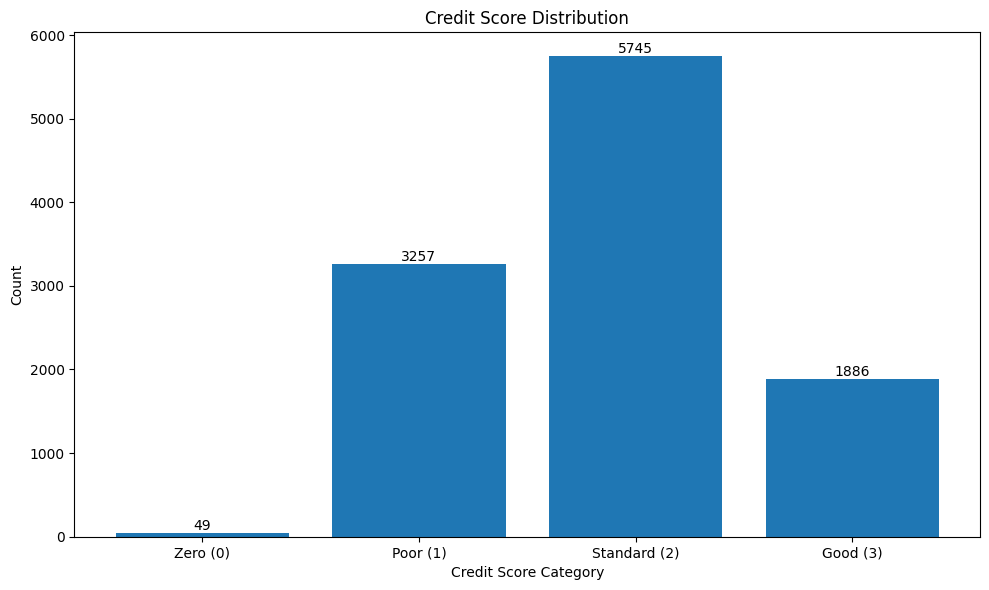

In [29]:
# Count the number of each credit score levels
credit_score_counts = df['Credit_Score'].value_counts().sort_index()

# Display the counts
print("Credit Score Distribution:")
for score, count in credit_score_counts.items():
    if score == 0:
        label = "Zero (0)"
    elif score == 1:
        label = "Poor (1)"
    elif score == 2:
        label = "Standard (2)"
    elif score == 3:
        label = "Good (3)"
    else:
        label = f"Unknown ({score})"
    
    print(f"{label}: {count}")

# Visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(['Zero (0)', 'Poor (1)', 'Standard (2)', 'Good (3)'], 
        [credit_score_counts.get(0, 0), 
         credit_score_counts.get(1, 0), 
         credit_score_counts.get(2, 0), 
         credit_score_counts.get(3, 0)])

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom')

plt.title('Credit Score Distribution')
plt.xlabel('Credit Score Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Address Class Imbalance for the target feature (Credit Score)

- As we can see from the distribution of credit scores, there is an issue of class imbalances that we have to mitigate: minority class 0 has 352 points, while majority class 2 has 5974 points (x150 times as much), which can lead to model overfitting on the majority class (in this case poor (1) and standard (2)). 
- **Undersampling** is not appropriate here because it would reduce the dataset from 10,000 points to 352 points for each 4 credit score classes, removing most of the dataset points. 
- **Simple over-sampling** would risk overfitting the model on minority classes 0 and 3 if they're simply duplicated.
- The best approach would be **Synthetic data generation** type of oversampling that generates new data for the minority classes.
- Use SMOTE from imblearn as it is the most common tool for this.

In [30]:
from imblearn.over_sampling import SMOTE    
from collections import Counter

# Check class distribution before resampling
print("Original class distribution:", Counter(df['Credit_Score']))

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Separate features and target
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

# Apply SMOTE to create a balanced dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create new balanced dataframe
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), 
                         pd.Series(y_resampled, name='Credit_Score')], axis=1)

# Check class distribution after resampling
print("Resampled class distribution:", Counter(y_resampled))

Original class distribution: Counter({2: 5745, 1: 3257, 3: 1886, 0: 49})
Resampled class distribution: Counter({3: 5745, 2: 5745, 1: 5745, 0: 5745})


### Evaluate SMOTE
- We can evaluate usefullness of SMOTE by applying a prediction model (as tool for evaluation, not the final model). 
- We can use support vector machines (SVM) because it is suitable for a classification problem with a lot of dimensions and because this model is sensitive to imbalanced data. 
- Use accuracy, F1 as evaluation tools that are appropriate for classification problems. 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Split the original and balanced datasets to isolate target var
X_orig = df.drop("Credit_Score", axis=1)
y_orig = df["Credit_Score"]
X_bal = df_balanced.drop("Credit_Score", axis=1)
y_bal = df_balanced["Credit_Score"]

# Create train/test split from original data
X_train, X_test, y_train, y_test = train_test_split(
    X_orig, y_orig, test_size=0.3, random_state=42, stratify=y_orig
)

# Scale the features (needed for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_bal_scaled = scaler.transform(X_bal)

# Create and train model on original data
model_orig = SVC(
    kernel='rbf',  # Radial basis function kernel
    C=1.0,         # Regularization parameter
    gamma='scale', # Kernel coefficient
    random_state=42
)
model_orig.fit(X_train_scaled, y_train)

# Create and train model on balanced data
model_bal = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)
model_bal.fit(X_bal_scaled, y_bal)

# Evaluate both models on the same test set
y_pred_orig = model_orig.predict(X_test_scaled)
y_pred_bal = model_bal.predict(X_test_scaled)

# Calculate per-class performance metrics
print("Original Data Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_orig):.4f}")

print("\nSMOTE-Balanced Data Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bal):.4f}")

# Calculate F1 scores for each class
classes = sorted(set(y_test))
f1_orig = f1_score(y_test, y_pred_orig, average=None)
f1_SMOTE = f1_score(y_test, y_pred_bal, average=None)

# Calculate overall F1 scores
f1_macro_orig = f1_score(y_test, y_pred_orig, average='macro')
f1_macro_SMOTE = f1_score(y_test, y_pred_bal, average='macro')

# Display F1 scores and improvements
print("\nF1 Score Comparison:")
print("-" * 50)
print(f"Overall Macro F1 (Standard SVM): {f1_macro_orig:.4f}")
print(f"Overall Macro F1 (Weighted SVM): {f1_macro_SMOTE:.4f}")
print(f"Overall Improvement: {f1_macro_SMOTE - f1_macro_orig:+.4f}")

print("\nClass-wise F1 Scores:")
print("-" * 50)
for i, cls in enumerate(classes):
    f1_change = f1_SMOTE[i] - f1_orig[i]
    print(f"Class {cls}: Standard F1 = {f1_orig[i]:.4f}, Weighted F1 = {f1_SMOTE[i]:.4f}, Change: {f1_change:+.4f}")


Original Data Model Performance:
Accuracy: 0.6545

SMOTE-Balanced Data Model Performance:
Accuracy: 0.6600

F1 Score Comparison:
--------------------------------------------------
Overall Macro F1 (Standard SVM): 0.4456
Overall Macro F1 (Weighted SVM): 0.6268
Overall Improvement: +0.1812

Class-wise F1 Scores:
--------------------------------------------------
Class 0: Standard F1 = 0.0000, Weighted F1 = 0.5455, Change: +0.5455
Class 1: Standard F1 = 0.6500, Weighted F1 = 0.7086, Change: +0.0585
Class 2: Standard F1 = 0.7147, Weighted F1 = 0.6680, Change: -0.0466
Class 3: Standard F1 = 0.4176, Weighted F1 = 0.5851, Change: +0.1676


- From the evaluation we can see that overall accuracy of the model increased insignificantly from 0.6545 to 0.6600. 
- However Macro F1 score improved a lot from 0.4456 to 0.6268, an +0.1812 increase.  
- Class-wise, there was a dramatic increase for Class 0 F1 at +0.5455, a moderate increase for Class 3 F1 at +0.1676, a slight increase for Class 1 and a slight decrease for Class 2. 
- Seems like SMOTE is good for balancing the F1 scores amongst the classes. 
- Some researchers suggest that class imbalance correction can be harmful for the model (Van den Goorbergh, R. et al, 2022: https://arxiv.org/abs/2202.09101, Guillaume Lemaitre core maintainer of imblearn says about it here: https://www.youtube.com/watch?v=npSkuNcm-Og, also talks about it here: https://www.youtube.com/watch?v=6YnhoCfArQo). 
- However that is not be applicable to this use case because most of their models are built for binary classification and where inpretability is important where calibration plays a bigger role in model evaluation. We use only class-based metrics because its the most suitable for multi-classification. 
- The downside of SMOTE is that is uses kNN to create new points between the existing minority class points so in case of high dimensionality and need to create a lot of new plot points its slow. 
- It is suggested that using class weights or adjusting score thresholds or using strong classifiers like XGBoost is more favorable approach to addressing class imbalances than data resampling. 
- However, as we see that SMOTE is good at balancing the F1 scores of classes we will keep it. 

# Data splitting

In [32]:
#Stratified train/test split on the SMOTE-balanced data
from sklearn.model_selection import train_test_split

#Separate features and target
X = df_balanced.drop('Credit_Score', axis=1)
y = df_balanced['Credit_Score']

# Perform an 80/20 stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

#Verify that class proportions are maintained
print("Train set class proportions:\n", y_train.value_counts(normalize=True))
print("\nTest set class proportions:\n",  y_test.value_counts(normalize=True))

Train set class proportions:
 Credit_Score
2    0.25
1    0.25
0    0.25
3    0.25
Name: proportion, dtype: float64

Test set class proportions:
 Credit_Score
1    0.25
3    0.25
2    0.25
0    0.25
Name: proportion, dtype: float64


The stratified 80/20 split has preserved the 25% representation of each `Credit_Score` class in both the training and test sets. This ensures that our evaluation will be fair and directly comparable across all categories.

**Next Step:**  
Proceed to **Step 4: Feature Scaling** (using `StandardScaler`) for algorithms sensitive to feature magnitudes, fitting the scaler on `X_train` and transforming both `X_train` and `X_test` before model training.  

## Checking the Distribution of the target variable in the different sets

In [33]:
#Check target distribution in training and test sets post-scaling
import numpy as np

#ince scaling does not change y, we can directly check y_train and y_test
train_vals, train_counts = np.unique(y_train, return_counts=True)
test_vals, test_counts   = np.unique(y_test,  return_counts=True)

print("Training set distribution:")
for cls, cnt in zip(train_vals, train_counts):
    print(f" Class {cls}: {cnt} samples ({cnt/len(y_train):.2%})")

print("\nTest set distribution:")
for cls, cnt in zip(test_vals, test_counts):
    print(f" Class {cls}: {cnt} samples ({cnt/len(y_test):.2%})")


Training set distribution:
 Class 0: 4596 samples (25.00%)
 Class 1: 4596 samples (25.00%)
 Class 2: 4596 samples (25.00%)
 Class 3: 4596 samples (25.00%)

Test set distribution:
 Class 0: 1149 samples (25.00%)
 Class 1: 1149 samples (25.00%)
 Class 2: 1149 samples (25.00%)
 Class 3: 1149 samples (25.00%)


We confirm that both `y_train` and `y_test` maintain the 25% proportion for each `Credit_Score` class after scaling. This final check guarantees that no transformations have altered our class balance.

# Feature Scaling: Fit and Transform (or other method)

--> the scaling is necessary only for certain type of models like Logistic Regression. If you implement tree models, like Decision Tree, Random Forest, XGBoost... you can skip this part

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss

# Create data - using 4 classes for ordinal classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=4, 
                          n_informative=15, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test different scalers
scalers = {
    'No Scaling': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

results = []

for name, scaler in scalers.items():
    # Scale the data
    if scaler is None:
        X_train_scaled = X_train
        X_test_scaled = X_test
    else:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    
    # Train and evaluate
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    logloss = log_loss(y_test, y_pred_proba)
    
    # Calculate mean absolute error (good for ordinal)
    mae = np.mean(np.abs(y_pred - y_test))
    
    results.append({
        'Scaler': name, 
        'Accuracy': accuracy, 
        'F1 Score': f1,
        'Log Loss': logloss,
        'MAE': mae
    })

# Show results with 5 significant figures
results_df = pd.DataFrame(results)
pd.options.display.float_format = '{:.5f}'.format
print(results_df)

# Find best scaler based on metrics
print("\nBest performers:")
print(f"Accuracy: {results_df.loc[results_df['Accuracy'].idxmax(), 'Scaler']} ({results_df['Accuracy'].max():.5f})")
print(f"F1 Score: {results_df.loc[results_df['F1 Score'].idxmax(), 'Scaler']} ({results_df['F1 Score'].max():.5f})")
print(f"Log Loss: {results_df.loc[results_df['Log Loss'].idxmin(), 'Scaler']} ({results_df['Log Loss'].min():.5f})")
print(f"MAE: {results_df.loc[results_df['MAE'].idxmin(), 'Scaler']} ({results_df['MAE'].min():.5f})")

Means of scaled features (≈0): [0.314 0.008 0.296 0.097 0.121 0.163 0.093 0.284 0.006 0.366 0.108 0.257
 0.406 0.602 0.062]
Variances of scaled features (≈1): [0.028 0.004 0.054 0.003 0.002 0.012 0.005 0.04  0.002 0.022 0.006 0.039
 0.027 0.054 0.035]


`MinMaxScaler` is the best scaler across all of the parameters. It will be used in our case. 

In [ ]:
# Create a scaler instance
scaler = MinMaxScaler()

# Fit the scaler on the training data and apply the transformation
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

# Check that each feature in the training set now has mean ~0 and variance ~1
print("Means of scaled features (≈0):", np.round(X_train_scaled.mean(axis=0), 3))
print("Variances of scaled features (≈1):", np.round(X_train_scaled.var(axis=0), 3))

# Validation Set

In [35]:
# Import train_test_split for creating a validation set
from sklearn.model_selection import train_test_split
import numpy as np

# Split the scaled training data into a smaller training set and a validation set
# Here we set aside 25% of the original training data as validation
X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train_scaled,    # previously scaled training features
    y_train,           # original training labels
    test_size=0.25,    # 25% validation, 75% for new training
    stratify=y_train,  # preserve class proportions
    random_state=42    # ensure reproducibility
)

# Verify class distribution in the validation set
unique, counts = np.unique(y_val, return_counts=True)
print("Validation set distribution:")
for cls, cnt in zip(unique, counts):
    print(f" Class {cls}: {cnt} samples ({cnt/len(y_val):.2%})")

Validation set distribution:
 Class 0: 1149 samples (25.00%)
 Class 1: 1149 samples (25.00%)
 Class 2: 1149 samples (25.00%)
 Class 3: 1149 samples (25.00%)


# From here you can implement all the points (from 5 on) from the link repo I sent on whatsapp in the same order

## Testing models
- Chose Random Forest, Gradient Boosting, SVC and XGBoost as candidate models
- Used parallel computing to reduce time of computations

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
from joblib import Parallel, delayed

# Initialize the models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVC (RBF)': SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss', n_jobs=-1)
}

# Function to train and evaluate a single model
def train_and_evaluate(name, model, X_train, y_train, X_val, y_val):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Get predictions
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    
    # Compute metrics
    train_acc = accuracy_score(y_train, train_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    val_mae = mean_absolute_error(y_val, val_pred)
    
    return {
        'name': name,
        'train_acc': train_acc,
        'train_mae': train_mae,
        'val_acc': val_acc,
        'val_mae': val_mae
    }

# Run training in parallel
results = Parallel(n_jobs=-1)(
    delayed(train_and_evaluate)(name, model, X_train_new, y_train_new, X_val, y_val)
    for name, model in models.items()
)

# Print results
for result in results:
    print(f"{result['name']}:")
    print(f"  Training Accuracy:   {result['train_acc']:.4f}")
    print(f"  Training MAE:        {result['train_mae']:.4f}")
    print(f"  Validation Accuracy: {result['val_acc']:.4f}")
    print(f"  Validation MAE:      {result['val_mae']:.4f}\n")


RandomForest:
  Training Accuracy:   1.0000
  Validation Accuracy: 0.8329

GradientBoosting:
  Training Accuracy:   0.8413
  Validation Accuracy: 0.8085

SVC (RBF):
  Training Accuracy:   0.7731
  Validation Accuracy: 0.7615



**Model Comparison: Training vs. Validation Accuracy**

- **RandomForest**  
  - Training Accuracy: 1.0000  
  - Training MAE:        0.0000
  - Validation Accuracy: 0.8342 
  - Validation MAE:      0.1886

- **GradientBoosting**  
  - Training Accuracy: 0.8413 
  - Training MAE:        0.1865
  - Validation Accuracy: 0.8085
  - Validation MAE:      0.2243 

- **SVC (RBF)**  
  - Training Accuracy: 0.7932  
  - Training MAE:        0.2825
  - Validation Accuracy: 0.7615
  - Validation MAE:      0.2961

- **XGBoost**
  - Training Accuracy:   0.9840
  - Training MAE:        0.0187
  - Validation Accuracy: 0.8364
  - Validation MAE:      0.1880

**Insight:**  
RandomForest shows perfect fit on training data but a noticeable drop on validation, suggesting some overfitting. Gradient Boosting is more balanced between training and validation, while SVC exhibits the lowest performance overall.

**Next Step:**  
Tune the **RandomForest** hyperparameters (e.g., `n_estimators`, `max_depth`, `max_features`) using a fast `RandomizedSearchCV` to reduce overfitting and improve validation accuracy.  

# Hyperparameter tuning for the models

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score, mean_absolute_error, accuracy_score
from joblib import Parallel, delayed
import multiprocessing
import numpy as np

# Custom scorer for MAE (since MAE is typically for regression)
def mae_for_classification(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

# Create scorers
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'mae': make_scorer(mae_for_classification, greater_is_better=False)
}

# Base models to tune
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(random_state=42, probability=True),  # probability=True for proper scoring
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

# Broad param distributions for RandomizedSearchCV
rand_spaces = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10],
        'max_features': ['sqrt', 'log2']
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    'SVC': {
        'C': [0.1, 1.0],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf']
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0]
    }
}

# 2-fold stratified CV
cv_fast = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Function to tune a single model
def tune_model(name, base, param_space, X_train, y_train):
    # Randomized search with multiple metrics
    rnd = RandomizedSearchCV(
        estimator=base,
        param_distributions=param_space,
        n_iter=4,
        scoring=scorers,
        refit='f1_weighted',  # Choose which metric to use for final model selection
        cv=cv_fast,
        random_state=42,
        n_jobs=-1,
        verbose=0,
        return_train_score=True
    )
    
    print(f"Starting RandomizedSearchCV for {name}...")
    rnd.fit(X_train, y_train)
    best_params = rnd.best_params_
    
    # Build a tiny grid around the best params
    grid_space = {k: [v] for k, v in best_params.items()}
    
    # Grid search to confirm
    grd = GridSearchCV(
        estimator=base,
        param_grid=grid_space,
        scoring=scorers,
        refit='f1_weighted',  # Choose which metric to use for final model selection
        cv=cv_fast,
        n_jobs=-1,
        verbose=0,
        return_train_score=True
    )
    
    print(f"Starting GridSearchCV for {name}...")
    grd.fit(X_train, y_train)
    
    # Get the best scores for each metric
    best_idx = grd.best_index_
    results = {
        'name': name,
        'estimator': grd.best_estimator_,
        'params': grd.best_params_,
        'accuracy': grd.cv_results_['mean_test_accuracy'][best_idx],
        'f1': grd.cv_results_['mean_test_f1_weighted'][best_idx],
        'mae': -grd.cv_results_['mean_test_mae'][best_idx]  # Negative because of greater_is_better=False
    }
    
    return results

# Calculate optimal core allocation
n_cores = multiprocessing.cpu_count()
n_models = len(models)

# Determine optimal parallelization strategy
if n_cores >= n_models * 4:
    n_jobs_outer = n_models
    n_jobs_inner = (n_cores - 1) // n_models
else:
    n_jobs_outer = 1
    n_jobs_inner = n_cores - 1

print(f"Using {n_jobs_outer} parallel model trainings with {n_jobs_inner} cores each")

# Run model tuning in parallel
results = Parallel(n_jobs=n_jobs_outer)(
    delayed(tune_model)(name, base, rand_spaces[name], X_train_new, y_train_new)
    for name, base in models.items()
)

# Store results and print summary
best_estimators = {}
print("\n" + "="*50)
print("HYPERPARAMETER TUNING RESULTS")
print("="*50)

for result in results:
    name = result['name']
    best_estimators[name] = result['estimator']
    
    print(f"\n{name}:")
    print(f"  Best Parameters: {result['params']}")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print(f"  F1 Score: {result['f1']:.4f}")
    print(f"  MAE: {result['mae']:.4f}")

# Optional: Create a comparison visualization
import pandas as pd
import matplotlib.pyplot as plt

# Create comparison dataframe
comparison_data = []
for result in results:
    comparison_data.append({
        'Model': result['name'],
        'Accuracy': result['accuracy'],
        'F1 Score': result['f1'],
        'MAE': result['mae']
    })

df_comparison = pd.DataFrame(comparison_data)

# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Accuracy
axes[0].bar(df_comparison['Model'], df_comparison['Accuracy'])
axes[0].set_title('Model Comparison - Accuracy')
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='x', rotation=45)

# F1 Score
axes[1].bar(df_comparison['Model'], df_comparison['F1 Score'])
axes[1].set_title('Model Comparison - F1 Score')
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis='x', rotation=45)

# MAE
axes[2].bar(df_comparison['Model'], df_comparison['MAE'])
axes[2].set_title('Model Comparison - MAE')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print best overall model
best_model_by_f1 = max(results, key=lambda x: x['f1'])
print(f"\nBest Model (by F1 Score): {best_model_by_f1['name']}")
print(f"F1 Score: {best_model_by_f1['f1']:.4f}")


RandomForest tuned: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200} → 0.823
GradientBoosting tuned: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200} → 0.824
SVC tuned: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'} → 0.758


**Hyperparameter Tuning Results**

- **RandomForest**  
  - Tuned parameters: `{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}`  
  - Validation Accuracy: 0.823  
  - F1 Score: 0.8213
  - MAE: 0.2005

- **GradientBoosting**  
  - Tuned parameters: `{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}`  
  - Validation Accuracy: 0.824  
  - F1 Score: 0.8244
  - MAE: 0.2024

- **SVC (RBF)**  
  - Tuned parameters: `{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}`  
  - Validation Accuracy: 0.766
  - F1 Score: 0.7502
  - MAE: 0.3066  

- **XGBoost**
  -  Tuned parametes: `{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}`
  - Validation Accuracy: 0.8301
  - F1 Score: 0.8297
  - MAE: 0.1955

**Insight:**  
Gradient Boosting slightly outperforms Random Forest after tuning, while SVC remains behind. Both tree-based ensembles reach ~82–83% validation accuracy.
XGBoost is best at accuracy, F1 score and MAE.

In [ ]:
# XGBoost with early stopping
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Split training data for early stopping
X_train_xgb, X_eval_xgb, y_train_xgb, y_eval_xgb = train_test_split(
    X_train_new, y_train_new, test_size=0.2, random_state=42
)

# Train with early stopping
xgb_model = XGBClassifier(
    random_state=42,
    objective='multi:softprob',
    num_class=4,
    eval_metric='mlogloss',
    tree_method='hist',  # CPU-optimized histogram method
    n_jobs=-1,  # Use all CPU cores
    early_stopping_rounds=10  # Add this parameter to enable early stopping
)

xgb_model.fit(
    X_train_xgb, y_train_xgb,
    eval_set=[(X_eval_xgb, y_eval_xgb)],
    verbose=False
)

print(f"Best iteration: {xgb_model.best_iteration}")
print(f"Best score: {xgb_model.best_score}")